In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
c = tf.constant(1) # 常數Tensor
v = tf.Variable(1) # 變數Tensor
print(c)
print(v)

tf.Tensor(1, shape=(), dtype=int32)
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


In [3]:
x = tf.constant(4)
print(x)
print("{}維Tensor，0維又稱標量".format(x.ndim))
y = tf.constant([1, 2, 3])
print(y)
print("{}維Tensor".format(y.ndim))
z = tf.constant([[1, 2, 3], [4, 5, 6]])
print(z)
print("{}維Tensor".format(z.ndim))

tf.Tensor(4, shape=(), dtype=int32)
0維Tensor，0維又稱標量
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
1維Tensor
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
2維Tensor


# Eager Execution 動態模式

In [4]:
a = tf.constant(4)
print(a)

tf.Tensor(4, shape=(), dtype=int32)


# Tensorflow 基本運算

In [5]:
import numpy as np
print("Eager Execution 是否啟動：{}".format(tf.executing_eagerly()))

Eager Execution 是否啟動：True


In [6]:
a = tf.constant(3)
b = tf.constant(4)
print("a = {}".format(a))
print("b = {}".format(b))

a = 3
b = 4


In [7]:
print(a)
print(b)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [8]:
c = a + b
print("a + b = {}".format(c))
d = a * b
print("a * b = {}".format(d))

a + b = 7
a * b = 12


In [9]:
a = tf.constant([[1., 2.], [3., 4.]], dtype = tf.float32) # 2維Tensor
b = np.array([[1., 2.], [3., 4.]], dtype = np.float32) # Numpy array的陣列
print("a constant：{}D Tensor".format(a.ndim))

c = a + b
print("a + b = \n{}".format(c))
d = tf.matmul(a, b)
print("a * b = \n{}".format(d))
print("NumpyArray：\n{}".format(c))

a constant：2D Tensor
a + b = 
[[2. 4.]
 [6. 8.]]
a * b = 
[[ 7. 10.]
 [15. 22.]]
NumpyArray：
[[2. 4.]
 [6. 8.]]


In [32]:
# 計算loss在 w 為 3 時的導數
w = tf.Variable([[3.0]])
print(w)
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss, w)
print(grad)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.]], dtype=float32)>
tf.Tensor([[6.]], shape=(1, 1), dtype=float32)


# Sequential Model (序列模型)

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [39]:
# Method:1
model = keras.Sequential(name='Sequential')
model.add(layers.Dense(64, activation = 'relu', input_shape = (784,))) # input_shape = (784,)指的是輸入一維的資料，常數不符合網路輸入格式
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [25]:
model.summary()

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Method:2
model = tf.keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (784,)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


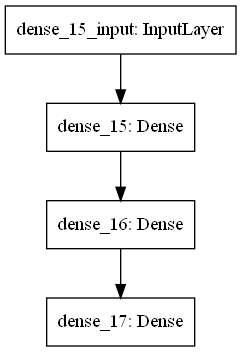

In [42]:
plot_model(model, to_file='./Network_img/Sequential_Model.png')
Image('./Network_img/Sequential_Model.png')

# Functional API (函數模型)

(1). Single Input and Output Model

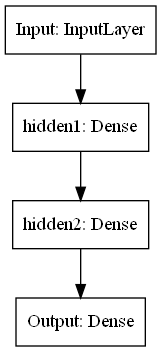

In [29]:
# 與Sequential不同，需建立輸入層
inputs = keras.Input(shape=(784,), name='Input')
# 隱藏層
h1 = layers.Dense(64, activation='relu', name='hidden1')(inputs)
h2 = layers.Dense(64, activation='relu', name='hidden2')(h1)
# 輸出層
outputs = layers.Dense(10, activation='softmax', name='Output')(h2)

model = keras.Model(inputs=inputs, outputs=outputs)

plot_model(model, to_file='./Network_img/Functional_API_Single_Input_And_Output_Model.png')
Image('./Network_img/Functional_API_Single_Input_And_Output_Model.png')

(2). Multi Input and Single Output Model
ex. 商品價格預測為兩輸入(圖片、品牌)、一輸出(價格)，圖片(128,128,3)輸入經過三層隱藏層，品牌(1,)輸入經過一層隱藏層，
將兩個資訊結合後在經過一層隱藏層，輸出為價格預測(1,)。

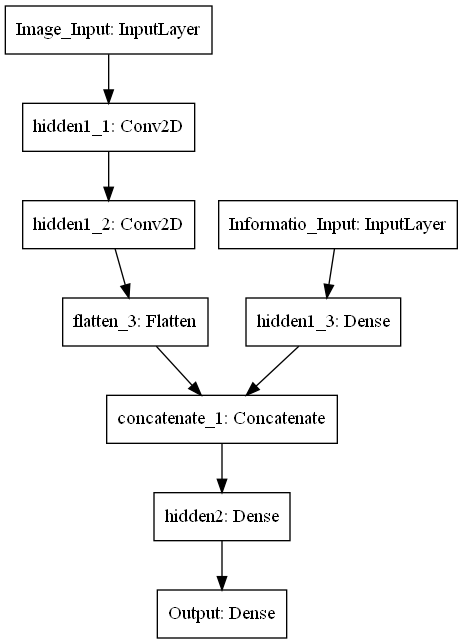

In [36]:
# 輸入層
img_input = keras.Input(shape=(128, 128, 3), name='Image_Input')
info_input = keras.Input(shape=(1,), name='Informatio_Input')
# 隱藏層
h1_1 = layers.Conv2D(64, 5, strides=2, activation='relu', name='hidden1_1')(img_input)
h1_2 = layers.Conv2D(32, 5, strides=2, activation='relu', name='hidden1_2')(h1_1)
h1_2_ft = layers.Flatten()(h1_2)
h1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
concat = layers.Concatenate()([h1_2_ft, h1_3])
h2 = layers.Dense(64, activation='relu', name='hidden2')(concat)
# 輸出層
outputs = layers.Dense(1, name='Output')(h2)

model = keras.Model(inputs=[img_input, info_input], outputs=outputs)

plot_model(model, to_file='./Network_img/Functional_API_Multi_Input_and_Single_Output_Model.png')
Image('./Network_img/Functional_API_Multi_Input_and_Single_Output_Model.png')

(3). Single Input and Multi Output Model ex.人像識別為一輸入(人物照片)、兩輸出(年齡和性別)，人物照片(128,128,3)輸入經過三層隱藏層，而輸出為年齡(1,)和性別(1,)。

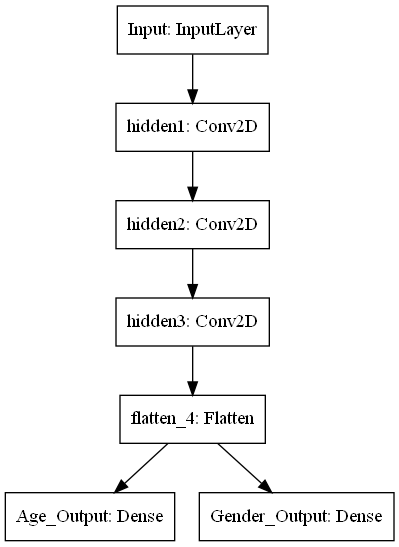

In [43]:
# 輸入層
inputs = keras.Input(shape=(128, 128, 3), name='Input')
# 隱藏層
h1 = layers.Conv2D(64, 3, activation='relu', name='hidden1')(inputs)
h2 = layers.Conv2D(64, 3, strides=2, activation='relu', name='hidden2')(h1)
h3 = layers.Conv2D(64, 3, strides=2, activation='relu', name='hidden3')(h2)
ft = layers.Flatten()(h3)
# 輸出層
age_output = layers.Dense(1, name='Age_Output')(ft)
gender_output = layers.Dense(1, name='Gender_Output')(ft)

model = keras.Model(inputs=inputs, outputs=[age_output, gender_output])

plot_model(model, to_file='./Network_img/Functional_API_Single_Input_and_Multi_Output_Model.png')
Image('./Network_img/Functional_API_Single_Input_and_Multi_Output_Model.png')

(4). Multi Input and Output Model ex.天氣預測為兩輸入(衛星雲圖、氣候資訊)、三輸出(機率、溫度、濕度)，衛星雲圖(256,256,3)輸入經過三層隱藏層，氣候資訊(10,)輸入經過一層隱藏層，並結合兩資訊，輸出為降雨機率(1,)、溫度(1,)、濕度(1,)。

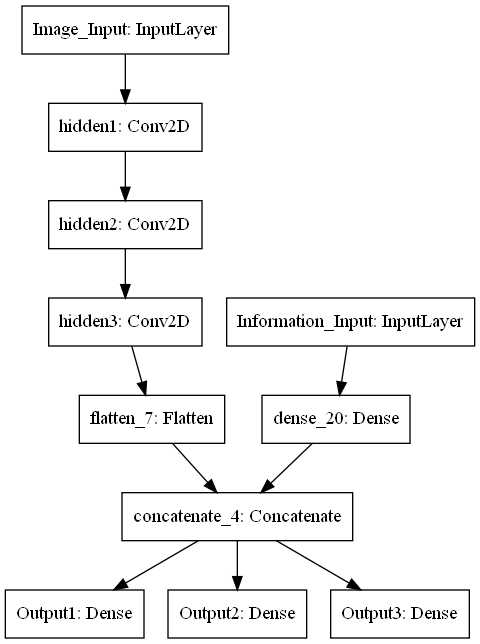

In [46]:
# 輸入層
img_inputs = keras.Input(shape=(256, 256, 3), name='Image_Input')
info_inputs = keras.Input(shape=(10,), name='Information_Input')
# 隱藏層
h1 = layers.Conv2D(64, 3, activation='relu', name='hidden1')(img_inputs)
h2 = layers.Conv2D(64, 3, strides=2, activation='relu', name='hidden2')(h1)
h3 = layers.Conv2D(64, 3, strides=2, activation='relu', name='hidden3')(h2)
ft = layers.Flatten()(h3)
h4 = layers.Dense(64)(info_inputs)
concat = layers.Concatenate()([ft, h4])
# 輸出層
weather_outputs = layers.Dense(1, name='Output1')(concat)
temp_outputs = layers.Dense(1, name='Output2')(concat)
humidity_outputs = layers.Dense(1, name='Output3')(concat)

model = keras.Model(inputs=[img_inputs, info_inputs], outputs=[weather_outputs, temp_outputs, humidity_outputs])

plot_model(model, to_file='./Network_img/Functional_API_Multi_Input_and_Output_Model.png')
Image('./Network_img/Functional_API_Multi_Input_and_Output_Model.png')

# tf.data

In [67]:
dataset = tf.data.Dataset.from_tensors(tf.constant([1,2,3,4,5,6,7,8,9,10], shape=(10,)))
print(dataset)

<TensorDataset shapes: (10,), types: tf.int32>


In [68]:
x_data = tf.data.Dataset.from_tensor_slices(tf.constant([0,1,2,3,4,5,6,7,8,9]))
print(x_data) # shape:()表一次讀取1個
y_data = tf.data.Dataset.from_tensor_slices(tf.constant([0,2,4,6,8,10,12,14,16,18]))
print(y_data)

<TensorSliceDataset shapes: (), types: tf.int32>
<TensorSliceDataset shapes: (), types: tf.int32>


In [69]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [70]:
for data1, data2 in zip(x_data, y_data):
    print('x:{}, y:{}'.format(data1, data2))

x:0, y:0
x:1, y:2
x:2, y:4
x:3, y:6
x:4, y:8
x:5, y:10
x:6, y:12
x:7, y:14
x:8, y:16
x:9, y:18


In [71]:
for data in dataset.take(1):
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [72]:
for data1, data2 in zip(x_data.take(5), y_data.take(5)):
    print('x:{}, y:{}'.format(data1, data2))

x:0, y:0
x:1, y:2
x:2, y:4
x:3, y:6
x:4, y:8


In [73]:
tf.data.Dataset.zip((x_data, y_data)) # zip:將多個Dataset打包成一個

<ZipDataset shapes: ((), ()), types: (tf.int32, tf.int32)>

In [74]:
# lambda為匿名函數，功用和 def function - return 一樣
tf.data.Dataset.range(10).map(lambda x: x*2) # map:可用來轉換資料

<MapDataset shapes: (), types: tf.int64>

In [75]:
x = tf.data.Dataset.range(10)
y = tf.data.Dataset.range(10).map(lambda x: x*3)
dataset = tf.data.Dataset.zip({"x":x, "y":y})
print(dataset)

<ZipDataset shapes: {x: (), y: ()}, types: {x: tf.int64, y: tf.int64}>


In [76]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: 0, y: 0
x: 1, y: 3
x: 2, y: 6
x: 3, y: 9
x: 4, y: 12
x: 5, y: 15
x: 6, y: 18
x: 7, y: 21
x: 8, y: 24
x: 9, y: 27


In [77]:
dataset = tf.data.Dataset.zip({"x":x, "y":y}).batch(2)
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [0 1], y: [0 3]
x: [2 3], y: [6 9]
x: [4 5], y: [12 15]
x: [6 7], y: [18 21]
x: [8 9], y: [24 27]


In [78]:
# shuffle: Dataset資料會被預先載入到buffer中，並從buffer中"隨機"挑出資料，取出資料產生的空位會從新的資料替補。
dataset = dataset.shuffle(10)
for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [8 9], y: [24 27]
x: [4 5], y: [12 15]
x: [0 1], y: [0 3]
x: [6 7], y: [18 21]
x: [2 3], y: [6 9]


In [79]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))
print('-' * 50)
dataset = dataset.repeat(2)
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [2 3], y: [6 9]
x: [6 7], y: [18 21]
x: [0 1], y: [0 3]
x: [4 5], y: [12 15]
x: [8 9], y: [24 27]
--------------------------------------------------
x: [8 9], y: [24 27]
x: [2 3], y: [6 9]
x: [4 5], y: [12 15]
x: [0 1], y: [0 3]
x: [6 7], y: [18 21]
x: [8 9], y: [24 27]
x: [0 1], y: [0 3]
x: [2 3], y: [6 9]
x: [4 5], y: [12 15]
x: [6 7], y: [18 21]
